<h1>Microdata Protection [HW1 - Heart Attack Dataset]</h1>

I import the relevant libraries needed for this homework:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
from scipy.linalg import cholesky
from scipy.stats import qmc
from sklearn.decomposition import PCA
from faker import Faker
import random

<p>The dataset must be imported. This can be done using pandas, which we imported in the previous step:

In [2]:
heart_ds = pd.read_csv("heart.csv")

# display dataset
heart_ds

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Since sensitive information from this dataset has been removed, we could expand the existing dataset to introduce additional pieces of information that are considered "risky". For instance, I have included names and marital status.

In [1]:
# adding names to the dataset
full_names = []

fake = Faker()

for _ in range(303):
    full_names.append(fake.name())
    
heart_ds['names'] = full_names

# Adding marital status to the dataset
marital_status = []
possible_choices = ['single', 'married', 'divorced', 'widow']

for _ in range(303):
    marital_status.append(random.choice(possible_choices))

heart_ds["marital status"] = marital_status

# adding race to the dataset (for simplicity I have not added other races)
race = []
existing_race = ['black', 'white', 'asian', 'native hawaiian', 'hispanic', 'american indian']

for _ in range(303):
    race.append(random.choice(existing_race))

heart_ds["race"] = race

# adding social security number 

Faker.seed(0)
ssn_column = []

for _ in range(303):
    ssn_column.append(fake.ssn())

heart_ds["social security number"] = ssn_column


NameError: name 'Faker' is not defined

The new dataset can be displayed in the following way:

In [4]:
# display dataset
heart_ds

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,names,marital status,race,social security number
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Amanda Dean,single,white,865-50-6891
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Christopher Stephens,widow,hispanic,042-34-8377
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Jamie Melendez,married,white,498-52-4970
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Albert Montes,divorced,black,489-46-9559
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Michael Nixon,widow,american indian,224-65-2282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Jacob Powell,divorced,hispanic,610-11-0581
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Cynthia Weiss,married,white,073-34-5008
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Brett Williams,widow,hispanic,547-44-1937
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Scott King,widow,black,543-32-2680


Statistics can be demonstrated using seaborn:

<AxesSubplot:xlabel='age', ylabel='Count'>

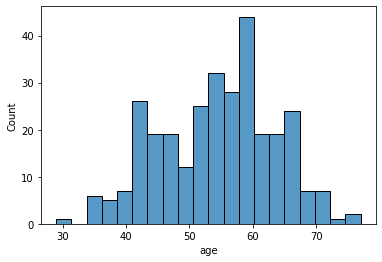

In [5]:
sns.histplot(data=heart_ds, x='age', bins=20)

A similar thing can be done for other parameters, such as the sex (male is 1 and female is 0):

<AxesSubplot:xlabel='sex', ylabel='Count'>

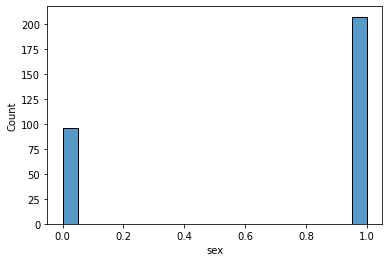

In [6]:
# Male is 1 and female is 0
sns.histplot(data=heart_ds, x='sex', bins=20)

<AxesSubplot:xlabel='marital status', ylabel='Count'>

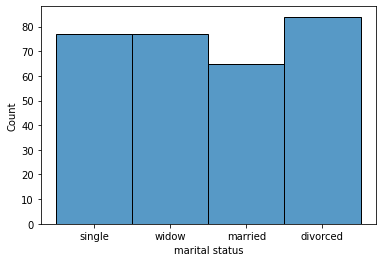

In [7]:
sns.histplot(data=heart_ds, x='marital status', bins=50)

### Macrodata

In [8]:
macro = heart_ds[['output', 'marital status']]

macro = pd.DataFrame(macro.groupby('output').value_counts()).reset_index()
macro = macro.reset_index().rename({0:'count'}, axis=1)
macro = macro.pivot_table(index='output', columns='marital status', values='count')

# display table
macro

# target : 0= less chance of heart attack 1= more chance of heart attack

marital status,divorced,married,single,widow
output,,,,
0,33,25,43,37
1,51,40,34,40


If you are a widow, you are more likely to die of a heart attack, and if you are married, you are less likely to have a heart attack. By setting a threshold (e.g., 40) for a higher chance of heart attack, we have to remove married data as well. This approach may affect the statistical properties of the database. We want to provide privacy while also retaining statistical properties.


One method that could be used is rounding. Using this approach, sensitive cell values would be rounded to the nearest chosen base number (e.g., 4). Here I am going to define a custom rounding function since Python does not have a built-in feature to round to the nearest multiple of a number:

In [9]:
# Define rounding function
def custom_round_func(number, base):
    return base * round(number / base)
    
base = 4
print(custom_round_func(15, base))

16


As can be seen, it works! The function could be applied to the column:

In [10]:
macro['widow (Rounded)'] = macro['widow'].apply(lambda x: custom_round_func(x, base))

print(macro.head())

# Here we can observe that using base 4 is not sufficient

macro['widow (Rounded 2)'] = macro['widow'].apply(lambda x: custom_round_func(x, base=20))
print(macro.head())

# Now that we increased the size of our base, it perform better.

marital status  divorced  married  single  widow  widow (Rounded)
output                                                           
0                     33       25      43     37               36
1                     51       40      34     40               40
marital status  divorced  married  single  widow  widow (Rounded)  \
output                                                              
0                     33       25      43     37               36   
1                     51       40      34     40               40   

marital status  widow (Rounded 2)  
output                             
0                              40  
1                              40  


### (n-k) rule

In [11]:
macro_chol = heart_ds[['race', 'chol', 'marital status']]
macro_chol = macro_chol.groupby(["race", "marital status"]).mean().reset_index()
macro_chol = macro_chol.pivot_table(index='race', columns='marital status', values='chol')
macro_chol

marital status,divorced,married,single,widow
race,,,,
american indian,223.833333,252.900000,252.875000,281.923077
asian,241.307692,230.666667,251.600000,249.785714
black,245.571429,262.230769,248.000000,215.375000
hispanic,235.500000,251.666667,248.363636,269.000000
native hawaiian,226.133333,242.000000,230.692308,261.769231
white,247.333333,230.875000,240.071429,249.222222


Now I will define a function to determine the level of contribution to find sensitive cells according to the (n-k) rule:

In [12]:
# Function receives a list of values and decides whether info is sensitive or not based on n and k
def nk_rule(values, n, k):
    deg_of_contribution = values/np.sum(values)
    print(f"contributions: {deg_of_contribution}")
    print(f"number of individuals contributing more than {k}: {np.sum(deg_of_contribution>k)}")
    return np.sum(deg_of_contribution > k) < n

In [13]:
# We define n and k values (3,30)
n = 3
k = 0.3

print(f"is the cell sensible according to {n}-{k} rule?: {nk_rule(np.array([30, 20, 20, 0]), n, k)}\n")
print(f"is the cell sensible according to {n}-{k} rule?: {nk_rule(np.array([30, 30, 30, 0]), n, k)}\n")

contributions: [0.42857143 0.28571429 0.28571429 0.        ]
number of individuals contributing more than 0.3: 1
is the cell sensible according to 3-0.3 rule?: True

contributions: [0.33333333 0.33333333 0.33333333 0.        ]
number of individuals contributing more than 0.3: 3
is the cell sensible according to 3-0.3 rule?: False



Now, back to our previous example:

In [14]:
n = 3
k = 0.2
val = np.array(heart_ds[(heart_ds['race']=='black') &
                         (heart_ds['marital status']=='divorced')]['chol'])

print(f"is the cell sensible according to {n}-{k} rule?: {nk_rule(val, n, k)}\n")

k = 0.04
print(f"is the cell sensible according to {n}-{k} rule?: {nk_rule(val, n, k)}\n")
# not sensitive because we have four individual more than 0.25

contributions: [0.06864456 0.07998837 0.06573589 0.06806283 0.0744619  0.06573589
 0.0788249  0.06835369 0.0858057  0.0735893  0.05904596 0.0840605
 0.06020942 0.06748109]
number of individuals contributing more than 0.2: 0
is the cell sensible according to 3-0.2 rule?: True

contributions: [0.06864456 0.07998837 0.06573589 0.06806283 0.0744619  0.06573589
 0.0788249  0.06835369 0.0858057  0.0735893  0.05904596 0.0840605
 0.06020942 0.06748109]
number of individuals contributing more than 0.04: 14
is the cell sensible according to 3-0.04 rule?: False



You can observe that when the value of k is changed to something that increases the number of n, it is no longer sensitive. It is important to choose parameters based on the dataset and our case to protect the users.

### Microdata: masking
### sampling

Individuals can be sampled by the index of instances within the dataset:

In [16]:
#select a sample of the individuals, by randomly sampling the indexes
sampled = npr.choice(heart_ds.index.to_list(), int(len(heart_ds.index.to_list())*0.3), replace=False)

#filter out individuals whose index is not among the sampled ones
sampled_heart_ds = heart_ds.loc[sampled, :]
sampled_heart_ds

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,names,marital status,race,social security number
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3,0,Dean Flynn,married,white,630-81-5536
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1,Dr. William Johnson,divorced,white,122-78-3253
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,Jeffrey Cruz,married,white,318-13-1209
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Barbara Newman,single,asian,262-04-8521
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2,1,Joshua Anderson,single,asian,543-33-1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0,Andrew Webster,married,black,125-46-0482
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,Jeremy Davis,divorced,hispanic,190-92-2030
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1,Erin Smith,divorced,white,696-03-8917
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1,Kimberly Williams,married,native hawaiian,023-36-7422


Note that now we have 90 rows, whereas before we had 303 rows. 

What challenges are associated with the sampling strategy? Well, sampling works because we assume the adversary does not know which units fall into the sampled set. This is known as "response knowledge" and we must make it hard for the attacker to understand how data is sampled. Otherwise, we cannot protect the privacy of users if the degree of uncertainty decreases for the adversary, since he has knowledge of how units are sampled.

### Generalization
The idea behind generalization is that we join multiple categories together to protect the outliers.

In [17]:
heart_ds['marital status'].unique()

array(['single', 'widow', 'married', 'divorced'], dtype=object)

In [18]:
# Prepare generalization map
generalization_map = {'married': 'espoused', 'widow': 'not married', 'single': 'not married', 'divorced':'not married'}

heart_ds['marital_generalized'] = heart_ds['marital status'].replace(generalization_map)

# Display table
heart_ds[['marital status', 'marital_generalized']]

,marital status,marital_generalized
0,single,not married
1,widow,not married
2,married,espoused
3,divorced,not married
4,widow,not married
...,...,...
298,divorced,not married
299,married,espoused
300,widow,not married
301,widow,not married


### Local Suppression

When discussing the n-k rule, we observed that, according to the rule, when k = 0.2 for n = 3, the cell was considered to be sensitive. In local suppression, we simply replace the values of sensitive cells. 

In [19]:
# [243 198 227 265 214 172 254 174 249 231 237]
heart_ds.loc[(heart_ds['race']=='black') 
         & (heart_ds['marital status']=='divorced') 
         & (heart_ds['chol'] > 240), 'chol']

11     275
50     256
131    271
140    295
156    253
231    289
Name: chol, dtype: int64

Now we will replace values that are higher than 240 with NA (not available).

In [20]:
heart_ds.loc[(heart_ds['race']=='black') 
         & (heart_ds['marital status']=='divorced') 
         & (heart_ds['chol'] > 240), 'chol'] = np.NaN

In [21]:
# Display

heart_ds.loc[(heart_ds['race']=='black') 
         & (heart_ds['marital status']=='divorced') 
         & (heart_ds['chol'] > 240), 'chol']

Series([], Name: chol, dtype: float64)

In [53]:
heart_ds.loc[(heart_ds['race']=='black') 
         & (heart_ds['marital status']=='divorced')].head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,names,marital status,race,social security number,marital_generalized,chol_level
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1,Albert Montes,divorced,black,489-46-9559,not married,"(234.0, 240.0]"
11,48,0,2,130,NaN,0,1,139,0,0.2,2,0,2,1,Daniel Hale,divorced,black,363-56-5181,not married,NaN
17,66,0,3,150,226.0,0,1,114,0,2.6,0,0,2,1,Sergio Wolfe,divorced,black,728-86-0019,not married,"(223.0, 229.0]"
49,53,0,0,138,234.0,0,0,160,0,0.0,2,0,2,1,Heather Valentine,divorced,black,120-91-3613,not married,"(229.0, 234.0]"
50,51,0,2,130,NaN,0,0,149,0,0.5,2,0,2,1,Gabriel Durham,divorced,black,381-22-5449,not married,NaN


We just used primary suppression; because the sensitive value can still be deduced in some cases, we may need to use secondary supression to suppress (replace) other values as we have respondents who contributed more than the k value.

### Global recoding
Using global recoding, we divide the domain into disjointed intervals:

In [23]:
heart_ds['chol_level'] = pd.cut(heart_ds['chol'], bins=10)

# display chol_level interval for few elements
heart_ds[['chol', 'chol_level']].head()

,chol,chol_level
0,233.0,"(213.6, 257.4]"
1,250.0,"(213.6, 257.4]"
2,204.0,"(169.8, 213.6]"
3,236.0,"(213.6, 257.4]"
4,354.0,"(345.0, 388.8]"


If we tried to do the same thing using qcut we would get an error. You can uncomment to see the error.

In [24]:
heart_ds['chol_level'] = pd.qcut(heart_ds['chol'], 20)

To clarify why this occurs, you can consider a scenario where you have many records that are "zero". Using qcut you try to put all elements into intervals while keeping the same quantity. If you have a large number of zeroes, qcut fails to act. You have multiple solutions. One is using cut instead of qcut. The other option is to use the duplicates='drop' option, which was introduced in panda >= 0.20.0.


Furthermore, we could reduce the number of bins to have a smaller number of elements, for example, to reduce the number of records that are "zero." Note that global recoding does not protect outliers. This is why top-coding and bottom-coding are useful since we may have only one individual in an interval.

### Top and bottom coding

First, we will demonstrate top coding by setting a threshold of 250:


Let us take a look at top coding:


In [25]:
# top coding
greater_index = heart_ds[heart_ds['chol']>240].index.to_list()

For bottom coding:

In [26]:
# bottom coding
below_index = heart_ds[heart_ds['chol'] < 220].index.to_list()

In [27]:
heart_ds.loc[greater_index, 'chol'] = ">240"
heart_ds.loc[below_index, 'chol'] = "<220"
heart_ds[(heart_ds['chol']==">240") | (heart_ds['chol']=="<220")]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,names,marital status,race,social security number,marital_generalized,chol_level
1,37,1,2,130,>240,0,1,187,0,3.5,0,0,2,1,Christopher Stephens,widow,hispanic,042-34-8377,not married,"(245.0, 252.6]"
2,41,0,1,130,<220,0,0,172,0,1.4,2,0,2,1,Jamie Melendez,married,white,498-52-4970,espoused,"(197.4, 204.0]"
4,57,0,0,120,>240,0,1,163,1,0.6,2,0,2,1,Michael Nixon,widow,american indian,224-65-2282,not married,"(327.6, 564.0]"
5,57,1,0,140,<220,0,1,148,0,0.4,1,0,1,1,Reginald Wood,divorced,native hawaiian,289-18-1554,not married,"(187.6, 197.4]"
6,56,0,1,140,>240,0,0,153,0,1.3,1,0,2,1,Ashley Santiago,married,american indian,634-33-8726,espoused,"(283.8, 299.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,<220,1,0,90,0,1.0,1,2,1,0,Melissa Jenkins,married,american indian,363-37-3212,espoused,"(175.0, 187.6]"
298,57,0,0,140,>240,0,1,123,1,0.2,1,0,3,0,Jacob Powell,divorced,hispanic,610-11-0581,not married,"(240.0, 245.0]"
299,45,1,3,110,>240,0,1,132,0,1.2,1,0,3,0,Cynthia Weiss,married,white,073-34-5008,espoused,"(259.4, 267.0]"
300,68,1,0,144,<220,1,1,141,0,3.4,1,2,3,0,Brett Williams,widow,hispanic,547-44-1937,not married,"(187.6, 197.4]"


It is evident that we have a defined threshold, and by putting values that are lower than 220, we protect the outliers that we were not protecting before.


### Resampling

In [28]:
def resampling(data, k):
    vals = npr.choice(data, size=((len(data), k)))
    rows, columns = vals.shape
    sorted_vals = np.array([sorted(vals[:, c]) for c in range(columns)]).T
    means = np.mean(sorted_vals, axis=1)
    output = np.zeros(len(data))
    
    for item, idx in enumerate(np.argsort(data)):
        output[idx] = means[item]
    return output

Now we will test this on our dataset:

In [29]:
dataset_values = resampling(heart_ds['trtbps'], 15)
print(f"original: {heart_ds['trtbps'].to_list()[:15]}")
print(f"output after resampling: {list(dataset_values[:15])}")

original: [145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 130, 110, 150]
output after resampling: [143.66666666666666, 130.46666666666667, 130.6, 120.0, 120.0, 139.86666666666667, 139.86666666666667, 119.86666666666666, 171.8, 147.13333333333333, 140.86666666666667, 130.6, 130.46666666666667, 110.26666666666667, 148.26666666666668]


### Adding noise
In the first phase, variables to which we want to add noise must be identified:

In [30]:
heart_vars = ["oldpeak", "slp", "caa", "thall"]

Using a heatmap, the distance between variables can be seen:

<AxesSubplot:>

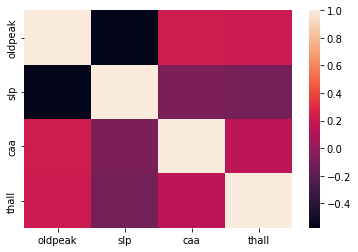

In [31]:
correl = heart_ds[heart_vars].corr()
sns.heatmap(correl)

Basically, two approaches exist:
1) Adding noise without considering variable correlation

2) Adding noise while considering correlation between variables

If we added noise without considering correlation:

In [32]:
sigmas2 = heart_ds[heart_vars].std()**2
print(f"stds: {sigmas2}")
alpha = 1.4
scaled_sigmas2 = sigmas2*alpha

stds: oldpeak    1.348095
slp        0.379735
caa        1.045724
thall      0.374883
dtype: float64


In [33]:
# generate the random noise with mean 0 and the computed standard deviations
noise = npr.normal(
                size=(len(heart_ds.index), len(heart_vars)), #set the size of the data
                loc=0, #set the mean 
                scale=scaled_sigmas2 #set the standard deviations
                  )

noised_idf = heart_ds.copy()
noised_idf[heart_vars] += noise

Then we will display the result when noise was added:

In [34]:
noised_idf[heart_vars]

,oldpeak,slp,caa,thall
0,2.367921,-0.653143,3.008285,0.280732
1,3.285301,-0.162963,-2.030429,2.564454
2,3.433196,1.268706,-1.396163,1.888543
3,-1.050259,1.747719,-0.542538,2.089361
4,0.602008,1.499113,1.847933,2.002942
...,...,...,...,...
298,1.188282,1.590696,0.199540,2.217382
299,-1.302253,1.669544,-0.224967,3.152227
300,1.884726,0.643134,6.380518,2.768669
301,1.361081,0.910867,1.050006,3.769259


To observe the difference from before:

<AxesSubplot:>

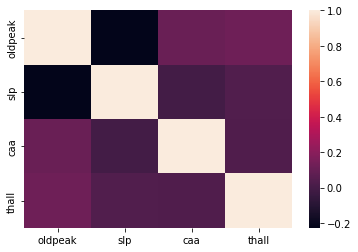

In [35]:
correl_noisy = noised_idf[heart_vars].corr()
sns.heatmap(correl_noisy)

This shows that patterns within the dataset were lost. This is not a good phenomenon, and we must take the alternative approach instead of randomly adding noise without considering correlation between variables:

In [36]:
# We consider relation between elements by computing covariance matrix
covariance_matrix = heart_ds[heart_vars].cov()
print(covariance_matrix.shape)
print(np.diag(covariance_matrix))

(4, 4)
[1.34809521 0.37973466 1.04572378 0.37488252]


To see how noise based on the covariance matrix is computed, I wrote the following:

In [37]:
covariance_noise = npr.multivariate_normal(np.zeros(len(heart_vars)), covariance_matrix, size=len(heart_ds.index))

Then, I added the noise:

In [38]:
noisy_ds_with_corr = heart_ds.copy()
noisy_ds_with_corr[heart_vars] += covariance_noise

# Display table 
noisy_ds_with_corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,names,marital status,race,social security number,marital_generalized,chol_level
0,63,1,3,145,233.0,1,0,150,0,1.774027,0.859748,0.827424,1.448509,1,Amanda Dean,single,white,865-50-6891,not married,"(229.0, 234.0]"
1,37,1,2,130,>240,0,1,187,0,4.145050,-0.381345,0.858518,2.943928,1,Christopher Stephens,widow,hispanic,042-34-8377,not married,"(245.0, 252.6]"
2,41,0,1,130,<220,0,0,172,0,2.628933,1.603669,0.220078,0.946885,1,Jamie Melendez,married,white,498-52-4970,espoused,"(197.4, 204.0]"
3,56,1,1,120,236.0,0,1,178,0,2.237317,1.212239,0.409088,3.122438,1,Albert Montes,divorced,black,489-46-9559,not married,"(234.0, 240.0]"
4,57,0,0,120,>240,0,1,163,1,0.069047,1.067033,-0.024725,1.787869,1,Michael Nixon,widow,american indian,224-65-2282,not married,"(327.6, 564.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,>240,0,1,123,1,-1.560447,1.400341,-1.098701,2.869036,0,Jacob Powell,divorced,hispanic,610-11-0581,not married,"(240.0, 245.0]"
299,45,1,3,110,>240,0,1,132,0,1.612510,0.464108,-1.401705,2.432163,0,Cynthia Weiss,married,white,073-34-5008,espoused,"(259.4, 267.0]"
300,68,1,0,144,<220,1,1,141,0,3.961363,0.223522,0.811622,2.942600,0,Brett Williams,widow,hispanic,547-44-1937,not married,"(187.6, 197.4]"
301,57,1,0,130,<220,0,1,115,1,0.314193,2.147805,0.972960,3.285237,0,Scott King,widow,black,543-32-2680,not married,"(125.999, 175.0]"


<AxesSubplot:>

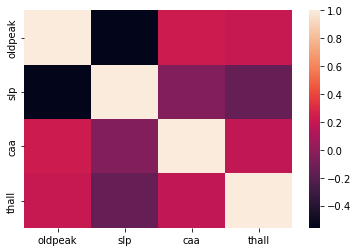

In [39]:
noisy_corr = noisy_ds_with_corr[heart_vars].corr()

# Display heatmap
sns.heatmap(noisy_corr)

It can be seen that the final output is much better compared to the scenario where we completely ignored distances and lost patterns in the dataset.

### Cholesky Decomposition

In [40]:
cholesky_cov = heart_ds[heart_vars].cov()

# The covariance will be M
M = cholesky(cholesky_cov)

# Conjugate of M is computed 
print(M.T.conj()@M)

[[ 1.34809521 -0.41321881  0.26439578  0.14946233]
 [-0.41321881  0.37973466 -0.05051035 -0.03952746]
 [ 0.26439578 -0.05051035  1.04572378  0.0950648 ]
 [ 0.14946233 -0.03952746  0.0950648   0.37488252]]


This is a synthetic method, in which we generate data:

In [41]:
P =  npr.multivariate_normal(np.zeros(len(heart_vars)), np.eye(len(heart_vars)), size=len(heart_ds.index))
synthetic_heart = P@M

In [42]:
print(np.cov(synthetic_heart.T))

[[ 1.15530911 -0.36989747  0.27687615  0.13660425]
 [-0.36989747  0.33936488 -0.06920701  0.0016567 ]
 [ 0.27687615 -0.06920701  1.04941076  0.08426249]
 [ 0.13660425  0.0016567   0.08426249  0.37891029]]


### Black and impute
In black and impute a tuple is chosen randomly and by computing the means, value is replaced:

In [43]:
proportion = 0.3
removable_items = [(r, c) for r in range(len(heart_ds.index)) for c in range(len(heart_vars)) if npr.random() < proportion]
means = heart_ds[heart_vars].mean()

black_n_impute = heart_ds[heart_vars].copy()
for r, c in removable_items:
    black_n_impute.iloc[r, c] = means[c]

In [44]:
# display dataset after replacing means
black_n_impute

,oldpeak,slp,caa,thall
0,2.300000,0.00000,0.729373,1.000000
1,1.039604,0.00000,0.000000,2.000000
2,1.400000,1.39934,0.000000,2.000000
3,0.800000,2.00000,0.729373,2.000000
4,0.600000,2.00000,0.000000,2.000000
...,...,...,...,...
298,0.200000,1.00000,0.000000,3.000000
299,1.200000,1.00000,0.729373,2.313531
300,1.039604,1.00000,2.000000,3.000000
301,1.039604,1.39934,1.000000,3.000000


In [45]:
# display original dataset
heart_ds[heart_vars]

,oldpeak,slp,caa,thall
0,2.3,0,0,1
1,3.5,0,0,2
2,1.4,2,0,2
3,0.8,2,0,2
4,0.6,2,0,2
...,...,...,...,...
298,0.2,1,0,3
299,1.2,1,0,3
300,3.4,1,2,3
301,1.2,1,1,3


In [46]:
### Uniqueness
list_of_vars = ["names", "race", "age", "chol", "marital status"]

# To measure population uniqueness we count number of elements over all elements in dataset
PU =(heart_ds[list_of_vars].value_counts() == 1).sum()/len(heart_ds.index)
print(f"population uniqueness: {PU:.3f}")

# Number of individuals
print(heart_ds[list_of_vars].value_counts())

population uniqueness: 0.980
names             race             age  chol   marital status
Aaron Shaffer     american indian  54   >240   single            1
Melinda Collins   white            35   <220   married           1
Matthew Webb      asian            62   >240   single            1
Matthew Hamilton  hispanic         46   <220   widow             1
Mathew Sellers    native hawaiian  67   229.0  divorced          1
                                                                ..
Eric White        american indian  51   227.0  married           1
Emily Smith       native hawaiian  54   <220   divorced          1
Emily James       hispanic         63   >240   widow             1
Ellen Wilson      american indian  58   240.0  single            1
Yvette Austin     hispanic         58   >240   widow             1
Length: 297, dtype: int64


### Record Linkage
In the last part, I will perform record linkage attack which makes use of fusing multiple sources of data:

In [48]:
# We import first dataset
first_dataset = pd.DataFrame(heart_ds)
names_from_first_list = first_dataset['names'].tolist() # 303 elements in list

In [49]:
# We create our second dataset (e.g. database of a bank which was leaked)
def generate_dataset(n):
    output = [{"address":fake.address(),
           "city":fake.city(),
           "iban":fake.iban(),
           "swift":fake.swift(length=8),
           "cc-provider":fake.credit_card_provider()} for x in range(n)]
    return output

second_dataset = pd.DataFrame(generate_dataset(303))

# append names from first list to second list to perform record linkage
second_dataset['names'] = names_from_first_list


# adding race to the dataset (for simplicity I have not added other races)
race_second = []
existing_race_2 = ['black', 'white', 'asian']

for _ in range(303):
    race_second.append(random.choice(existing_race_2))

second_dataset["race"] = race_second

print(second_dataset)

                                               address                city  \
0             838 Robert Roads\nFigueroaview, NV 49234          East David   
1    6081 Gina Streets Suite 050\nNew Adamview, SC ...         Jessicabury   
2    3373 Rebecca Bypass Apt. 125\nLake Daniellebur...      Lake Mistyport   
3    396 Shawn Junction Apt. 915\nAmandamouth, AK 6...  East Miguelborough   
4               13126 Scott Club\nHansenfurt, HI 33233        Robinsonview   
..                                                 ...                 ...   
298    9744 Kristen Ways Apt. 891\nWatsonton, MT 38862        Jacksonmouth   
299   43020 Liu Light Apt. 386\nNorth Daniel, VT 26345    North Robertberg   
300        114 Peters Plain\nSouth Codyburgh, OH 65459           Jaredstad   
301  371 Joshua Terrace Suite 531\nTimothyberg, ND ...           South Don   
302  61216 Miller Branch Apt. 264\nStokesborough, N...  Port Danielleburgh   

                       iban     swift                  cc-provi

To compare, I am using recordlinkage library and I use jaro-winkler method:

In [50]:
import recordlinkage

indexer = recordlinkage.Index()
indexer.block("names")
candidate_links = indexer.index(first_dataset, second_dataset)

In [51]:
compare_cl = recordlinkage.Compare()


compare_cl.string("names", "names", method="jarowinkler", threshold=0.9, label="names")
compare_cl.string("race", "race", method="jarowinkler", threshold=0.9, label="race")

# Compare the records
features = compare_cl.compute(candidate_links, first_dataset, second_dataset)

# display features
features.describe()

,names,race
count,305.0,305.000000
mean,1.0,0.163934
std,0.0,0.370824
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,0.000000
75%,1.0,0.000000
max,1.0,1.000000


In [52]:
features.sum(axis=1).value_counts().sort_index(ascending=False)

features[features.sum(axis=1) >= 0]

,,names,race
0,0,1.0,1.0
1,1,1.0,0.0
2,2,1.0,0.0
3,3,1.0,0.0
4,4,1.0,0.0
...,...,...,...
298,298,1.0,0.0
299,299,1.0,1.0
300,300,1.0,0.0
301,301,1.0,0.0
